In [1]:
import mne
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt 

In [2]:
data = mne.io.read_raw_edf('VIE_Fn_Sl_bashirinslf_och.edf')

Extracting EDF parameters from /home/srg/Documents/MSU/EEG/VIE_Fn_Sl_bashirinslf_och.edf...
EDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
L El 1 1, L El 1 2, L El 1 3, L El 2 1, L El 2 2, L El 2 3, L El 3 1, L El 3 2, L El 3 3, METKA
Creating raw.info structure...


In [3]:
data.info

<Info | 7 non-empty values
 bads: []
 ch_names: O1-M1, O2-M2, P3-M1, P4-M2, C3-M1, C4-M2, F3-M1, F4-M2, Fp1-M1, ...
 chs: 29 EEG
 custom_ref_applied: False
 highpass: 0.5 Hz
 lowpass: 503.0 Hz
 meas_date: 2020-02-15 16:49:00 UTC
 nchan: 29
 projs: []
 sfreq: 1006.0 Hz
>

In [6]:
data.ch_names

['O1-M1',
 'O2-M2',
 'P3-M1',
 'P4-M2',
 'C3-M1',
 'C4-M2',
 'F3-M1',
 'F4-M2',
 'Fp1-M1',
 'Fp2-M2',
 'T5-M1',
 'T6-M2',
 'T3-M1',
 'T4-M2',
 'F7-M1',
 'F8-M2',
 'Fz-M1',
 'Cz-M2',
 'Pz-M1',
 'L El 1 1',
 'L El 1 2',
 'L El 1 3',
 'L El 2 1',
 'L El 2 2',
 'L El 2 3',
 'L El 3 1',
 'L El 3 2',
 'L El 3 3',
 'METKA']

In [4]:
raw_data = data.get_data()

In [5]:
raw_data.shape

(29, 660636)

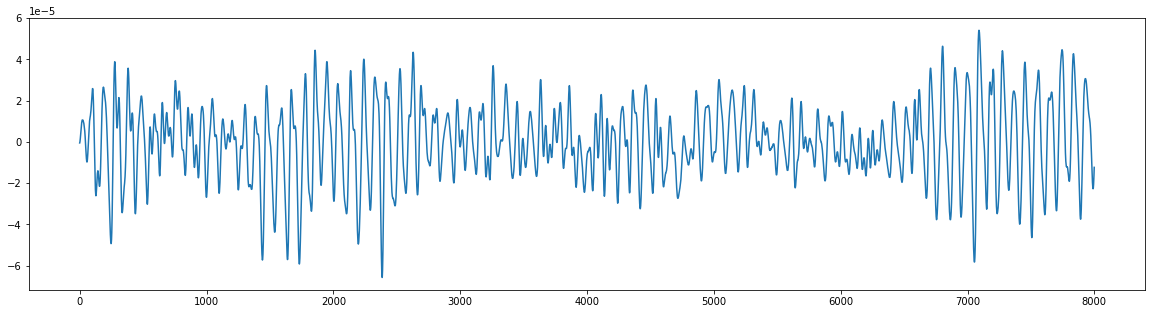

In [30]:
plt.figure(figsize=(20, 5))
plt.plot(raw_data[0, :8000])

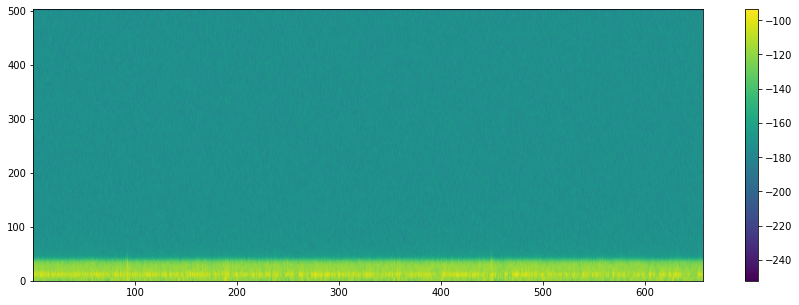

In [29]:
plt.figure(figsize=(15, 5))
plt.specgram(raw_data[0, :], Fs=1006.04)
plt.colorbar()
plt.show()

In [3]:
data = mne.io.read_raw_edf('VIE_Fn_Sl_bashirinslf_och.edf')
raw_data = data.get_data()

raw_data = raw_data[:19, :]
labeled_data = mne.io.RawArray(raw_data, mne.create_info(['O1','O2','P3', 'P4', 'C3', 'C4', 'F3', 'F4','Fp1','Fp2','T5','T6','T3', 'T4', 'F7', 'F8', 'Fz', 'Cz','Pz'], 1006.04, ch_types='eeg'))

Extracting EDF parameters from /home/srg/Documents/MSU/EEG/VIE_Fn_Sl_bashirinslf_och.edf...
EDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
L El 1 1, L El 1 2, L El 1 3, L El 2 1, L El 2 2, L El 2 3, L El 3 1, L El 3 2, L El 3 3, METKA
Creating raw.info structure...
Creating RawArray with float64 data, n_channels=19, n_times=660636
    Range : 0 ... 660635 =      0.000 ...   656.669 secs
Ready.


299 events found
Event IDs: [ 1  2  3  4  5  6  7 11 12 13 14 15 16 17]
Using matplotlib as 2D backend.


<IPython.core.display.Javascript object>


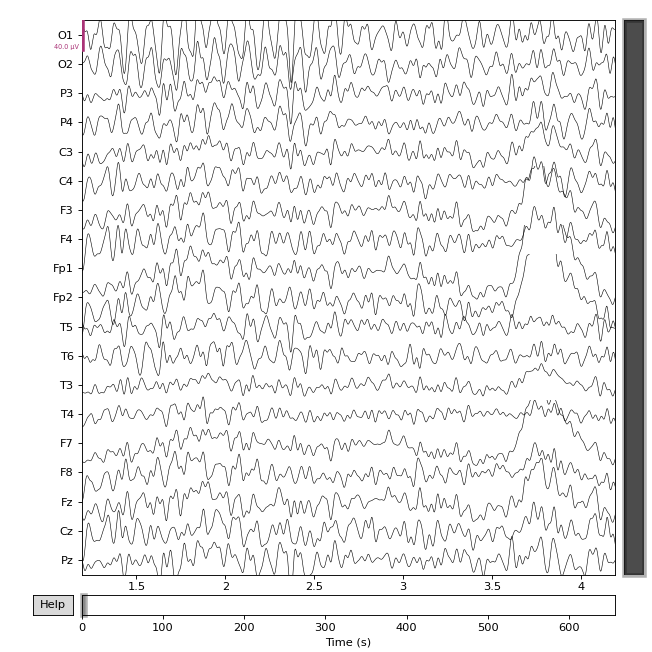

<IPython.core.display.Javascript object>


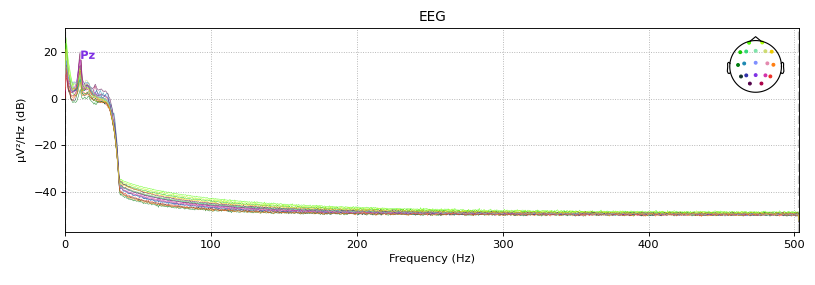

Effective window size : 2.036 (s)


[]

In [4]:
%matplotlib notebook

events = mne.find_events(data, stim_channel='METKA')

labeled_data.set_montage('standard_1020')
labeled_data.load_data()
labeled_data.plot(duration=3)
labeled_data.plot_psd()
[]

    delta [0.5, 4] Hz
    teta [4, 8] Hz
    alpha [8, 12] Hz
    beta [13, 30] Hz
    hamma [31, 120] Hz

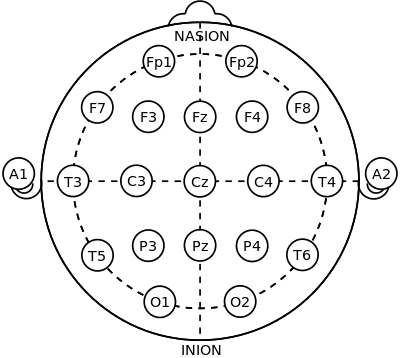

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 3321 samples (3.301 sec)



<IPython.core.display.Javascript object>


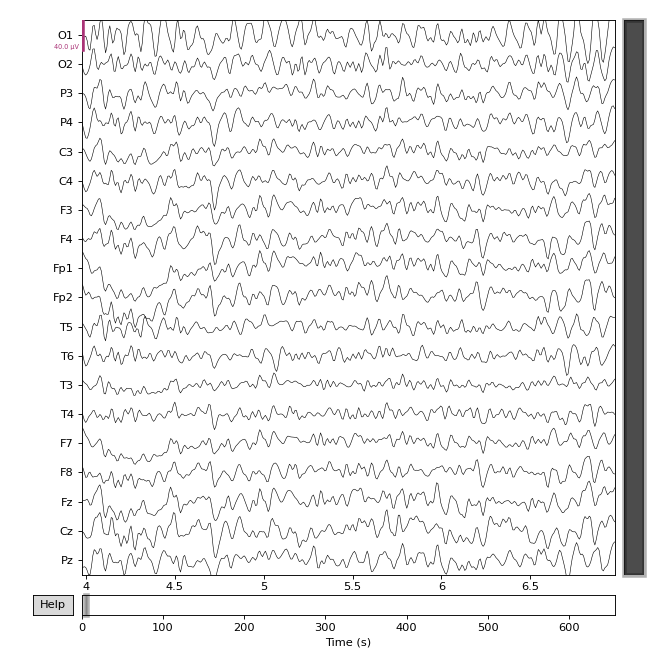

[]

In [5]:
labeled_data = labeled_data.filter(1, 40)
labeled_data.plot(duration=3)

[]

### Independent Component Analysis 

Fitting ICA to data using 19 channels (please be patient, this may take a while)
Selecting by number: 5 components
Fitting ICA took 3.6s.


<IPython.core.display.Javascript object>


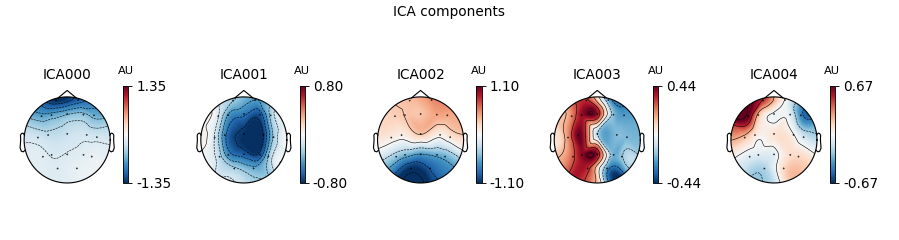

[<MNEFigure size 702x187.56 with 10 Axes>]

In [172]:
ica = mne.preprocessing.ICA(n_components = 5)
ica.fit(labeled_data)
ica.plot_components(colorbar=True, sensors=True, ch_type='eeg')

Applying ICA to Raw instance
    Transforming to ICA space (5 components)
    Zeroing out 1 ICA component
    Projecting back using 19 PCA components


<IPython.core.display.Javascript object>


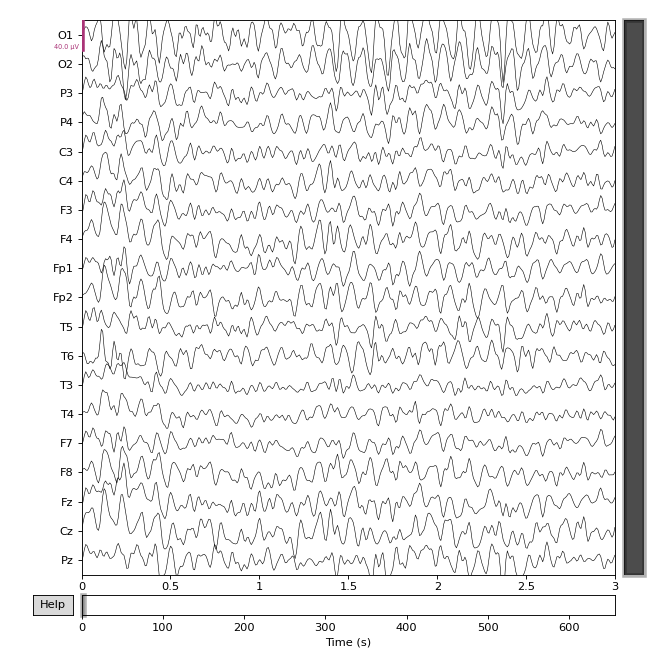

[]

In [173]:
ica.apply(labeled_data, exclude=[0])
labeled_data.plot(duration=3)

[]

Fitting ICA to data using 19 channels (please be patient, this may take a while)
Selecting by number: 5 components
Fitting ICA took 3.2s.


<IPython.core.display.Javascript object>


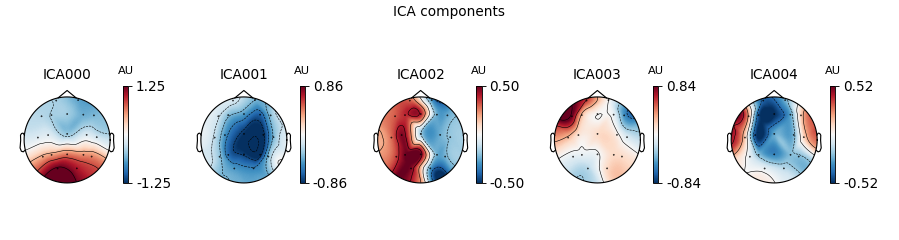

[<MNEFigure size 702x187.56 with 10 Axes>]

In [174]:
ica_new = mne.preprocessing.ICA(n_components = 5)
ica_new.fit(labeled_data)
ica_new.plot_components(colorbar=True, sensors=True, ch_type='eeg')

### Events

In [175]:
e = mne.Epochs(labeled_data, events)

Not setting metadata
Not setting metadata
299 matching events found
Setting baseline interval to [-0.1997932487773846, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated


In [176]:
evented_data = e.get_data()
print(f'evented_data.shape {evented_data.shape}')
print(f'events.shape {events.shape}')

Loading data for 299 events and 705 original time points ...
0 bad epochs dropped
evented_data.shape (299, 19, 705)
events.shape (299, 3)


In [177]:
events
# event time (sample number) / value of the steam channel before the event / event id 

array([[  2887,      0,     16],
       [  6007,      0,     14],
       [  7550,      0,      4],
       [  9126,      0,     15],
       [ 13787,      0,      7],
       [ 15363,      0,     14],
       [ 16906,      0,      4],
       [ 18481,      0,     14],
       [ 20015,      0,      4],
       [ 21600,      0,     12],
       [ 23142,      0,      2],
       [ 24720,      0,     17],
       [ 26263,      0,      7],
       [ 27837,      0,     13],
       [ 29381,      0,      3],
       [ 30958,      0,     17],
       [ 32500,      0,      7],
       [ 34076,      0,     12],
       [ 35618,      0,      2],
       [ 38737,      0,      7],
       [ 40313,      0,     17],
       [ 43431,      0,     15],
       [ 46550,      0,     11],
       [ 51211,      0,      5],
       [ 52787,      0,     15],
       [ 54329,      0,      5],
       [ 63687,      0,      4],
       [ 65263,      0,     12],
       [ 66805,      0,      2],
       [ 69922,      0,      3],
       [ 7

<IPython.core.display.Javascript object>


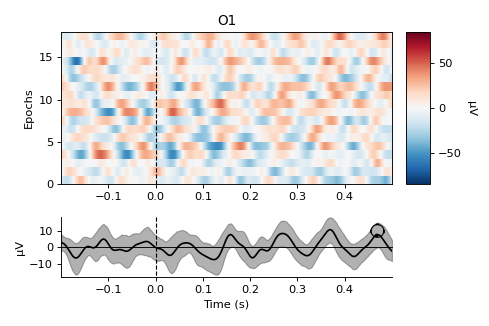

Loading data for 18 events and 705 original time points ...
Not setting metadata
Not setting metadata
18 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


<IPython.core.display.Javascript object>


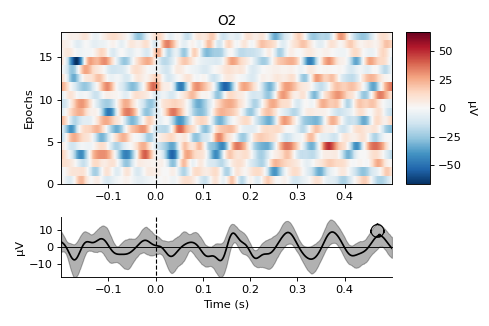

Loading data for 18 events and 705 original time points ...
Not setting metadata
Not setting metadata
18 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


<IPython.core.display.Javascript object>


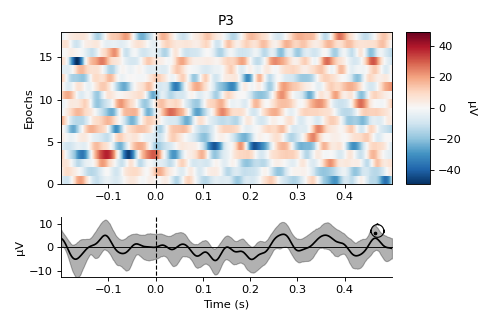

Loading data for 18 events and 705 original time points ...
Not setting metadata
Not setting metadata
18 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


<IPython.core.display.Javascript object>


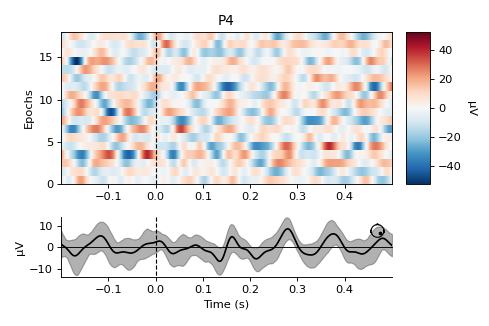

Loading data for 18 events and 705 original time points ...
Not setting metadata
Not setting metadata
18 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


<IPython.core.display.Javascript object>


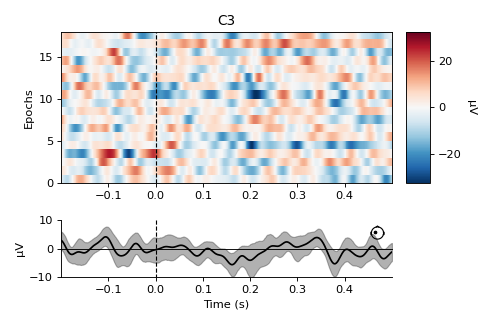

Loading data for 18 events and 705 original time points ...
Not setting metadata
Not setting metadata
18 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


<IPython.core.display.Javascript object>


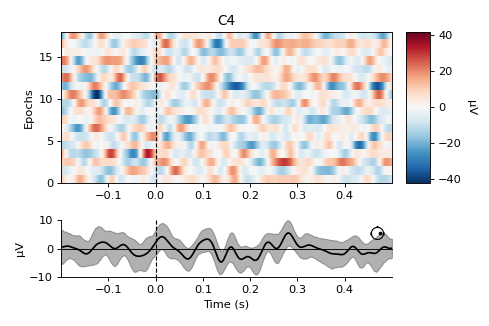

Loading data for 18 events and 705 original time points ...
Not setting metadata
Not setting metadata
18 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


<IPython.core.display.Javascript object>


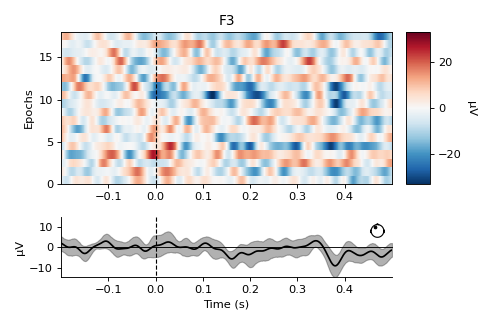

Loading data for 18 events and 705 original time points ...
Not setting metadata
Not setting metadata
18 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


<IPython.core.display.Javascript object>


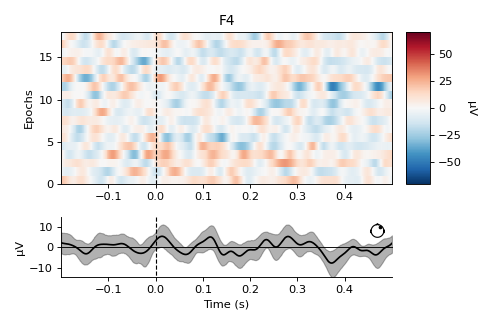

Loading data for 18 events and 705 original time points ...
Not setting metadata
Not setting metadata
18 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


<IPython.core.display.Javascript object>


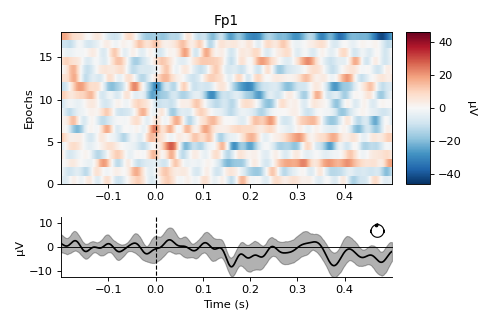

Loading data for 18 events and 705 original time points ...
Not setting metadata
Not setting metadata
18 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


<IPython.core.display.Javascript object>


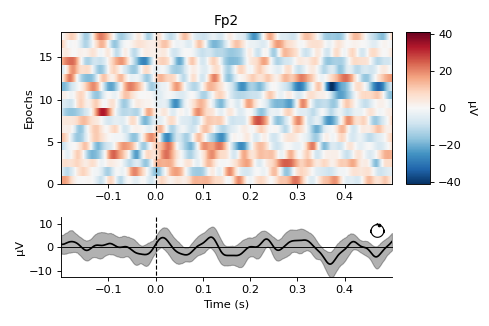

Loading data for 18 events and 705 original time points ...
Not setting metadata
Not setting metadata
18 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


<IPython.core.display.Javascript object>


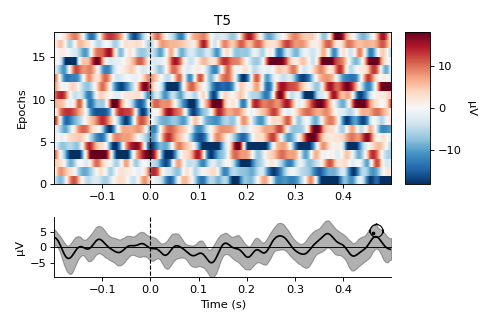

Loading data for 18 events and 705 original time points ...
Not setting metadata
Not setting metadata
18 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


<IPython.core.display.Javascript object>


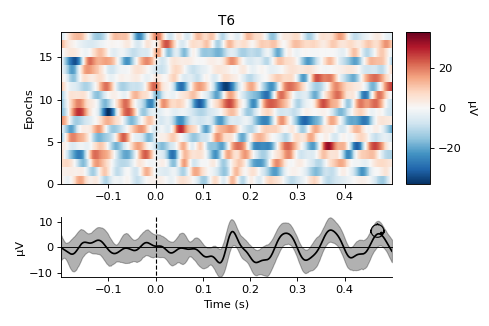

Loading data for 18 events and 705 original time points ...
Not setting metadata
Not setting metadata
18 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


<IPython.core.display.Javascript object>


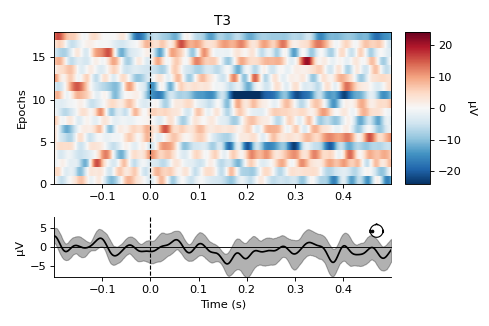

Loading data for 18 events and 705 original time points ...
Not setting metadata
Not setting metadata
18 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


<IPython.core.display.Javascript object>


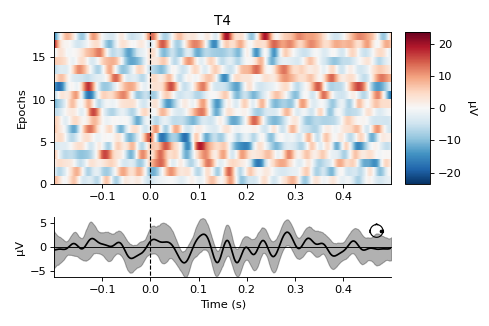

Loading data for 18 events and 705 original time points ...
Not setting metadata
Not setting metadata
18 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


/home/srg/.local/lib/python3.8/site-packages/mne/viz/epochs.py:387: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  this_fig = figure()


<IPython.core.display.Javascript object>


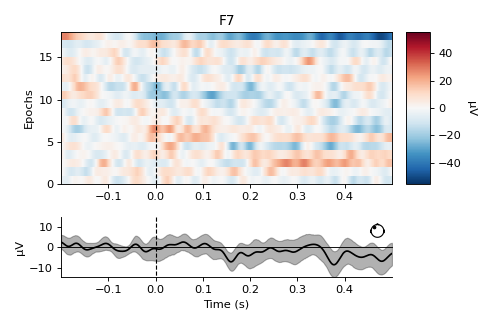

Loading data for 18 events and 705 original time points ...
Not setting metadata
Not setting metadata
18 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


<IPython.core.display.Javascript object>


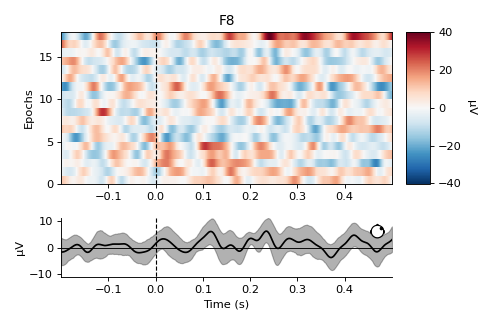

Loading data for 18 events and 705 original time points ...
Not setting metadata
Not setting metadata
18 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


<IPython.core.display.Javascript object>


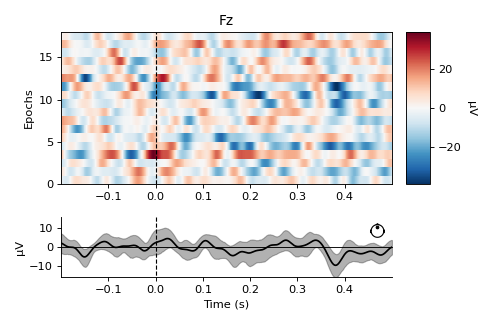

Loading data for 18 events and 705 original time points ...
Not setting metadata
Not setting metadata
18 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


<IPython.core.display.Javascript object>


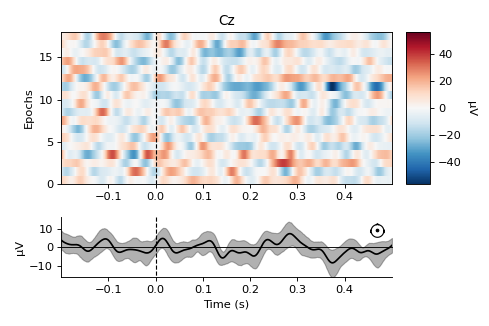

Loading data for 18 events and 705 original time points ...
Not setting metadata
Not setting metadata
18 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


<IPython.core.display.Javascript object>


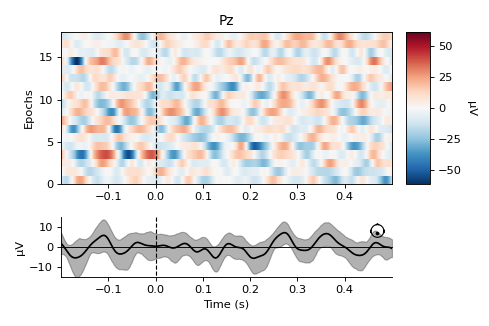

Loading data for 18 events and 705 original time points ...
Not setting metadata
Not setting metadata
18 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


In [188]:
for i in range(19):
    mne.viz.plot_epochs_image(e['15'], picks=[i]) # label 15 with all channels 